In [124]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error

# MultipleLinearRegression:

In [125]:
class multiple_LR():
    def __init__(self):
        self.coef_=None
        self.intercept_=None

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        betas=np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.coef_=betas[1:]
        self.intercept_=betas[0]

    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [126]:
df=pd.read_csv('energy_efficiency_data.csv')
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Cooling_Load',axis=1),df.iloc[:,-1],test_size=0.3)
x_train

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
179,0.69,735.0,294.0,220.50,3.5,5,0.10,3,11.14
262,0.76,661.5,416.5,122.50,7.0,4,0.10,5,32.46
436,0.90,563.5,318.5,122.50,7.0,2,0.25,4,32.67
160,0.79,637.0,343.0,147.00,7.0,2,0.10,3,35.78
252,0.82,612.5,318.5,147.00,7.0,2,0.10,5,24.37
...,...,...,...,...,...,...,...,...,...
63,0.82,612.5,318.5,147.00,7.0,5,0.10,1,22.58
606,0.71,710.5,269.5,220.50,3.5,4,0.40,2,14.40
433,0.98,514.5,294.0,110.25,7.0,3,0.25,4,28.55
481,0.98,514.5,294.0,110.25,7.0,3,0.25,5,28.58


In [129]:
scaler=StandardScaler()

In [130]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [131]:
x_train_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [132]:
lr=multiple_LR()

In [133]:
lr.fit(x_train_df,y_train)

In [134]:
y_pred=lr.predict(x_test_df)

In [135]:
print("r2_score: ",r2_score(y_test,y_pred))

r2_score:  0.9420383106849056


In [136]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  1.6735047973272532


Text(0, 0.5, 'y_pred')

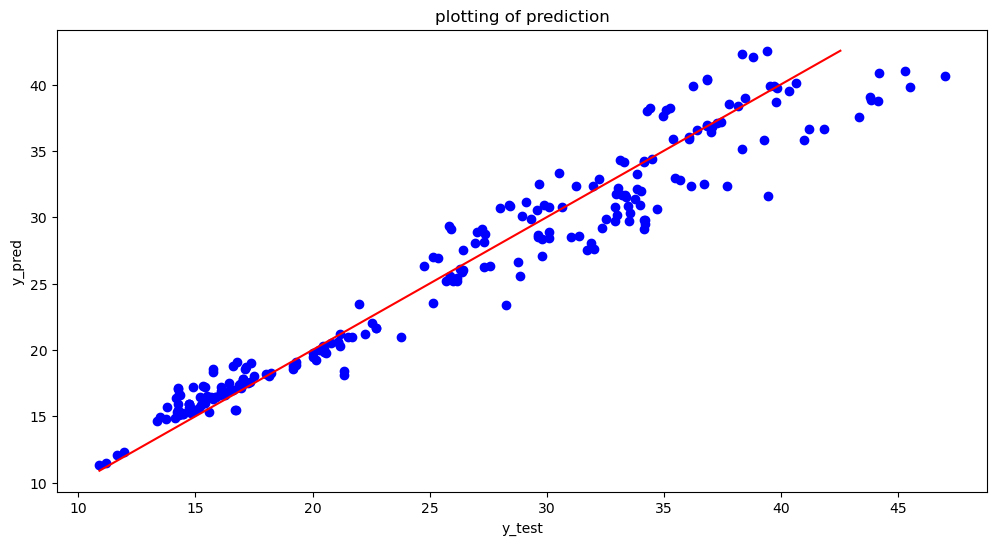

In [137]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=y_pred,color='blue')
plt.plot((y_test.min(),y_pred.max()),(y_test.min(),y_pred.max()),color='red')
plt.title("plotting of prediction")
plt.xlabel("y_test")
plt.ylabel("y_pred")